<a href="https://colab.research.google.com/github/virf96/Proyectos/blob/master/Invirtiendo_la_difereciaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima
from pmdarima.arima import auto_arima 

In [2]:
import pandas as pd
filepath = "https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv"
df_comp = pd.read_csv(filepath, parse_dates=['date'],index_col='date')
print('Tamaño del dataset',df_comp.shape)
print('Nombre de variables',df_comp.columns)
df_comp.tail


Tamaño del dataset (123, 8)
Nombre de variables Index(['rgnp', 'pgnp', 'ulc', 'gdfco', 'gdf', 'gdfim', 'gdfcf', 'gdfce'], dtype='object')


<bound method NDFrame.tail of               rgnp    pgnp    ulc  gdfco    gdf  gdfim  gdfcf  gdfce
date                                                                
1959-01-01  1606.4  1608.3   47.5   36.9   37.4   26.9   32.3   23.1
1959-04-01  1637.0  1622.2   47.5   37.4   37.5   27.0   32.2   23.4
1959-07-01  1629.5  1636.2   48.7   37.6   37.6   27.1   32.4   23.4
1959-10-01  1643.4  1650.3   48.8   37.7   37.8   27.1   32.5   23.8
1960-01-01  1671.6  1664.6   49.1   37.8   37.8   27.2   32.4   23.8
...            ...     ...    ...    ...    ...    ...    ...    ...
1988-07-01  4042.7  3971.9  179.6  131.5  124.9  106.2  123.5   92.8
1988-10-01  4069.4  3995.8  181.3  133.3  126.2  107.3  124.9   92.9
1989-01-01  4106.8  4019.9  184.1  134.8  127.7  109.5  126.6   94.0
1989-04-01  4132.5  4044.1  186.1  134.8  129.3  111.1  129.0  100.6
1989-07-01  4162.9  4068.4  187.4  137.2  130.2  109.8  129.9   98.2

[123 rows x 8 columns]>

In [3]:
#Solo trabajaremos con una variable con el fin hacer la ejemplificación
dat=df_comp["gdfim"]
dat.head()

date
1959-01-01    26.9
1959-04-01    27.0
1959-07-01    27.1
1959-10-01    27.1
1960-01-01    27.2
Name: gdfim, dtype: float64

<function matplotlib.pyplot.show>

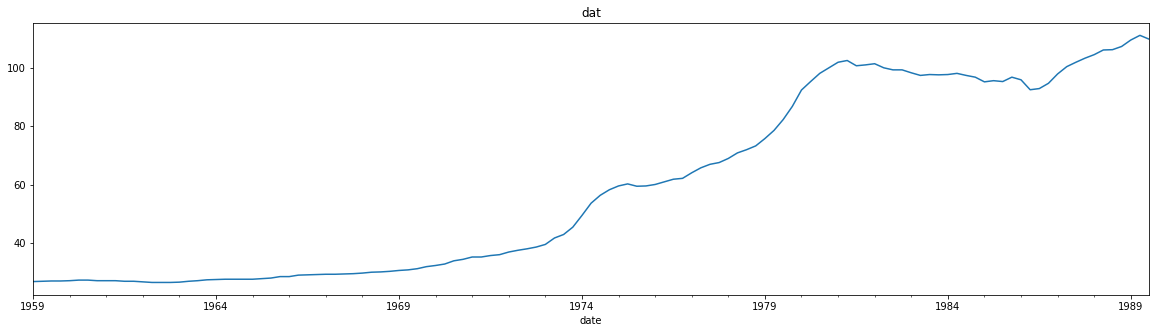

In [4]:
#Veamos como se ve la serie de tiempo
import matplotlib.pyplot as plt
dat.plot(figsize=(20,5), title = "dat")
plt.show

In [5]:
#Veamos si la series es estacionaria
import statsmodels.tsa.stattools as sts
results= sts.adfuller(dat)
#Rechazamos que sea estacionario dado que no pasa la prueba de significancia
print('p-value: %f' % results[1])

p-value: 0.938674


In [6]:
#Veamos con se ve la diferenciación como podemos obserar no es más que la resta del valor actual con el anterior
dat.diff()

date
1959-01-01    NaN
1959-04-01    0.1
1959-07-01    0.1
1959-10-01    0.0
1960-01-01    0.1
             ... 
1988-07-01    0.1
1988-10-01    1.1
1989-01-01    2.2
1989-04-01    1.6
1989-07-01   -1.3
Name: gdfim, Length: 123, dtype: float64

In [7]:
dat_transformed = dat.diff().dropna()
dat_transformed.tail()

date
1988-07-01    0.1
1988-10-01    1.1
1989-01-01    2.2
1989-04-01    1.6
1989-07-01   -1.3
Name: gdfim, dtype: float64

<function matplotlib.pyplot.show>

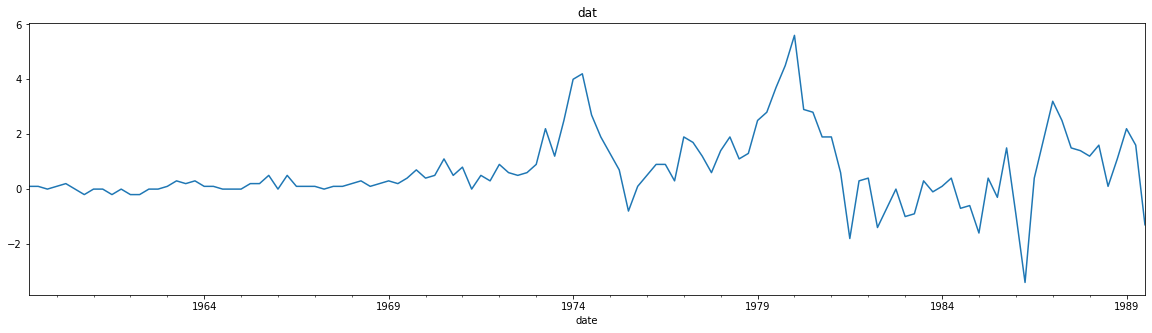

In [8]:
#Veamos como se ve la primera diferenciación de los datos
dat_transformed.plot(figsize=(20,5), title = "dat")
#Observamos un cambio notariamente bueno, al parecer es estacional
plt.show

In [9]:
#Validamos que la diferenciación de la serie sea estacional
results= sts.adfuller(dat_transformed)
#Se acepta la prueba, por lo que podemos decir que la series es estacional
print('p-value: %f' % results[1])

p-value: 0.000554


In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
#Ahora veamos con un AutoArima un posible buen modelo para la serie
#Con d=0 indicamos que no queremos que haga otra diferenciación
model_auto = auto_arima(dat_transformed,d=0)
#Observamos que el modelo que nos arroja es un modelo AR(1)
model_auto

ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [43]:
#Indicamos que queremos 10 predicciones del modelo ajustado
pred = model_auto.predict(n_periods = 10)
#Lo guardamos en un data frame
df_auto_pred = pd.DataFrame(pred)
df_auto_pred

,0
0,-0.766828
1,-0.381183
2,-0.102245
3,0.099511
4,0.245441
5,0.350993
6,0.427339
7,0.482560
8,0.522502
9,0.551392


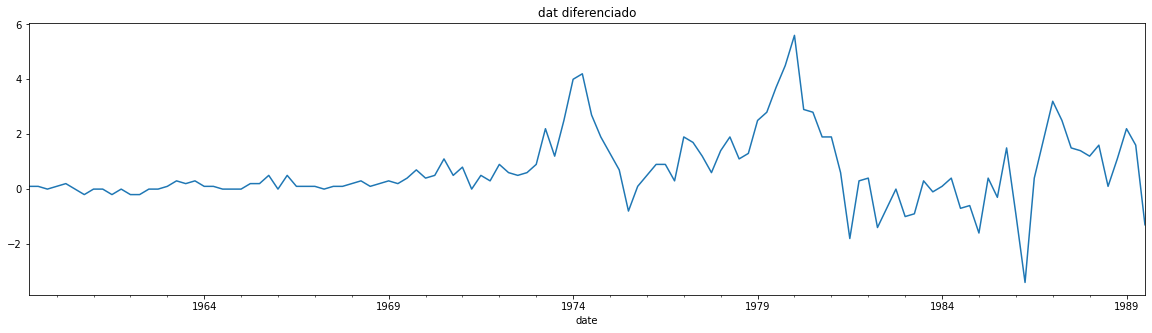

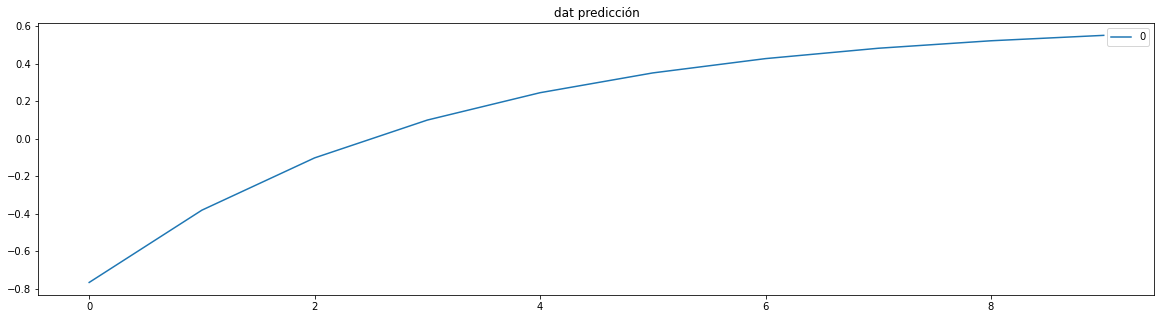

In [44]:
#Validemos que la predicción para la diferenciación se buena
dat_transformed.plot(figsize=(20,5), title = "dat diferenciado")
df_auto_pred.plot(figsize=(20,5), title = "dat predicción")
#Observamos un cambio notariamente bueno, al parecer es estacional
plt.show()

In [21]:
#Ahora regresemos la variable a su forma original
#Tomamos el útimo valor y lo vamos sumando con el acumulado de la suma 
df_forecast = dat.iloc[-1] + df_auto_pred.cumsum()
df_forecast

,0
0,109.033172
1,108.651989
2,108.549744
3,108.649255
4,108.894696
5,109.245689
6,109.673028
7,110.155589
8,110.678091
9,111.229482


<function matplotlib.pyplot.show>

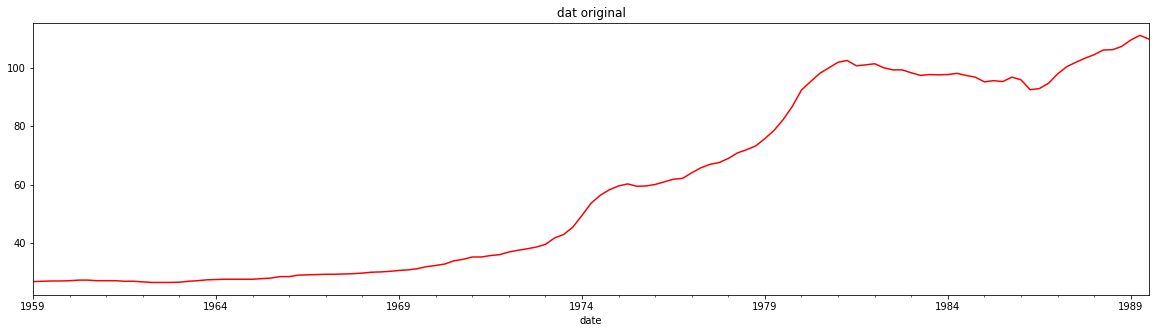

In [50]:
#Datos originales sin diferenciar
dat.plot(figsize=(20,5),color='red', title = "dat original")
plt.show

<function matplotlib.pyplot.show>

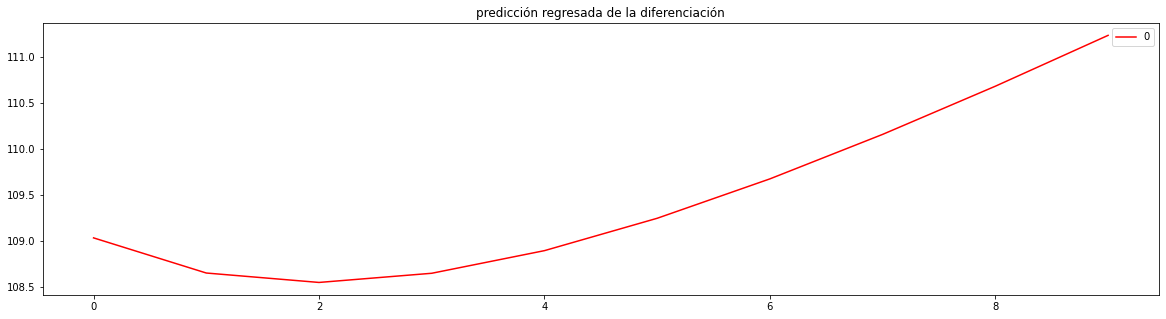

In [49]:
#Validemos que la predicción si haya sido regresada a su forma original
df_forecast.plot(figsize=(20,5),color = 'red',title='predicción regresada de la diferenciación')
plt.show

In [52]:
#Como hemos visto la predicción no es muy buena pero recordemos que es importante checar más modelos además del AutoArima además de incluir variables exógenas.
#Ya que pudimos ver el comportamiento, ahora vamos a predecir datos futuros
#Vamos a predicir a partir un periodo delannte de la última fecha de 'dat' que fue con la que empezamos a modelar e indicamos que la frecuencia es trimestral
#También definimos 10 periodos a predecir 
dates = pd.date_range(start='1989-10-01',freq='QS',periods=10)
dates

DatetimeIndex(['1989-10-01', '1990-01-01', '1990-04-01', '1990-07-01',
               '1990-10-01', '1991-01-01', '1991-04-01', '1991-07-01',
               '1991-10-01', '1992-01-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

In [55]:
df_forecast.index=dates
df_forecast.columns=['Predictions']
df_forecast.head()

,Predictions
1989-10-01,109.033172
1990-01-01,108.651989
1990-04-01,108.549744
1990-07-01,108.649255
1990-10-01,108.894696


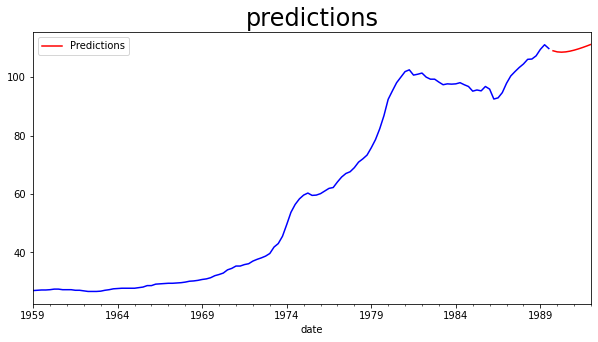

In [56]:
df_forecast.plot(figsize=(10,5),color='red')
dat.plot(color='blue')
plt.title("predictions",size=24)
plt.show()